# Exploratory Data Analysis on Super Store

- Which Category is Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Category?
- Which is the Top Selling Sub-Category?
- Which Customer Segment is Most Profitable?
- Which is the Preferred Ship Mode?
- Which Region is the Most Profitable?

## Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
super_store = pd.read_csv('SampleSuperstore.csv')
super_store


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [6]:
super_store.shape

(9994, 13)

In [7]:
super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Cleaning

### Removing any missing and duplicated values

In [10]:
super_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
super_store.duplicated().sum()

np.int64(17)

In [12]:
super_store.drop_duplicates(inplace = True)
super_store.shape

(9977, 13)

### Added Profit Margin % column 

In [13]:
super_store['Profit Margin %'] = (super_store.Profit / super_store.Sales) * 100
super_store.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [14]:
super_store.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


## Exploratory Data Analysis

### Which Category is Best Selling and Most Profitable ?

In [16]:
category = super_store.groupby('Category')[['Profit', 'Sales', 'Quantity']].sum()
category

,Profit,Sales,Quantity
Category,,,
Furniture,18421.8137,741306.3133,8020
Office Supplies,122364.6608,718735.2440,22861
Technology,145454.9481,836154.0330,6939


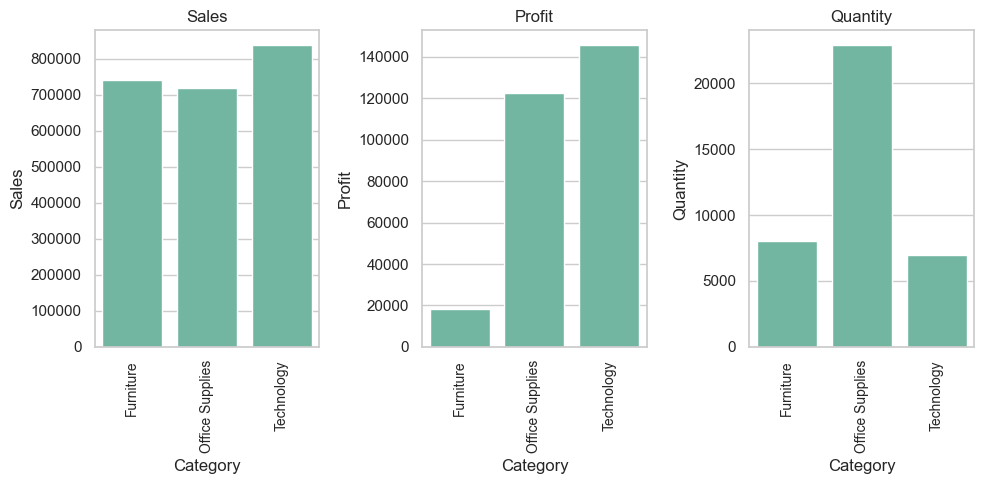

In [40]:
sns.set_theme(style="whitegrid", palette="Set2")
figure, axis = plt.subplots(1, 3, figsize=(10, 5))

# Plot barplots
cat1 = sns.barplot(x = category.index, y = category.Sales, ax=axis[0])
cat2 = sns.barplot(x = category.index, y = category.Profit, ax=axis[1])
cat3 = sns.barplot(x = category.index, y = category.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 10)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 10)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

###  What are the Best Selling and Most Profitable Sub-Category ?

In [25]:
sub_category = super_store.groupby(['Sub-Category'])[['Sales', 'Profit']].sum()

In [26]:
sub_category_sales = pd.DataFrame(sub_category.sort_values('Sales', ascending = False))
sub_category_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [27]:
sub_category_profit = pd.DataFrame(sub_category.sort_values('Profit', ascending = False))
sub_category_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


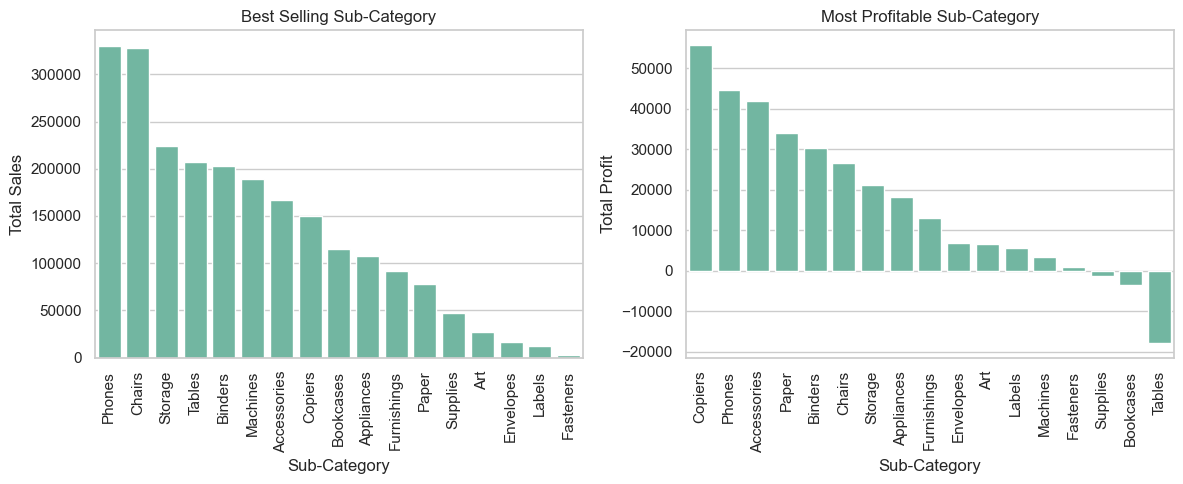

In [39]:
sns.set_theme(style="whitegrid", palette="Set2")
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

# Plot Bar Plot for Best Selling Sub-Category
sns.barplot(x=sub_category_sales.index, y=sub_category_sales.Sales, ax=axis[0])
axis[0].set_title("Best Selling Sub-Category")
axis[0].set_ylabel("Total Sales")

# Plot Bar Plot for Most Profitable Sub-Category
sns.barplot(x=sub_category_profit.index, y=sub_category_profit.Profit, ax=axis[1])
axis[1].set_title("Most Profitable Sub-Category")
axis[1].set_ylabel("Total Profit")

# Rotate axis for x-axis
for ax in axis:
    plt.setp(ax.get_xticklabels(), rotation=90)

# Set spacing between subplots
fig.tight_layout()
plt.show()

### Which is the top selling category ?


In [43]:
subcat_quantity = pd.DataFrame(super_store.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


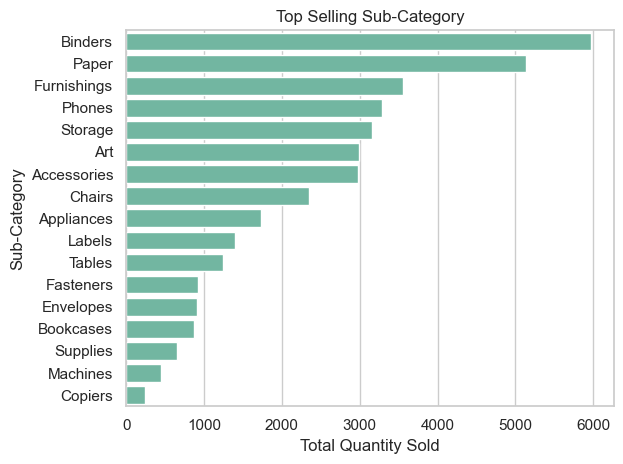

In [47]:
sns.set_theme(style="whitegrid", palette="Set2")

sns.barplot(x=subcat_quantity.Quantity, y=subcat_quantity.index)

plt.title("Top Selling Sub-Category")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()


### Which Customer Segment is Most Profitable ?

In [54]:
seg_analysis = pd.DataFrame(super_store.groupby(['Segment'])['Profit'].sum())
seg_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


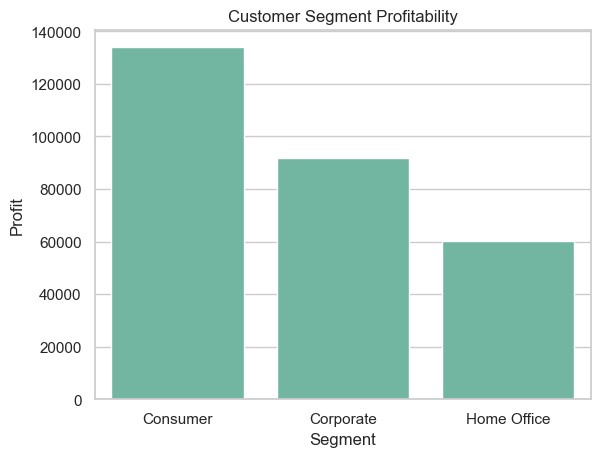

In [57]:
sns.set_theme(style="whitegrid",palette="Set2")
sns.barplot(data = seg_analysis, x = seg_analysis.index, y = seg_analysis.Profit)
plt.title("Customer Segment Profitability")
plt.show()

### Which is the Preferred Ship Mode ?

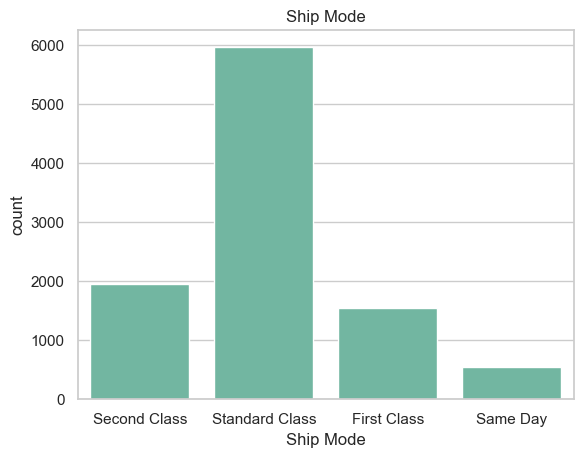

In [50]:
sns.set_theme(style="whitegrid", palette="Set2")

sns.countplot(x=super_store['Ship Mode'])

plt.title("Ship Mode")
plt.show()


### Which Region is the Most Profitable ?

In [51]:
reg_analysis = pd.DataFrame(super_store.groupby(['Region'])['Profit'].sum().reset_index())
reg_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


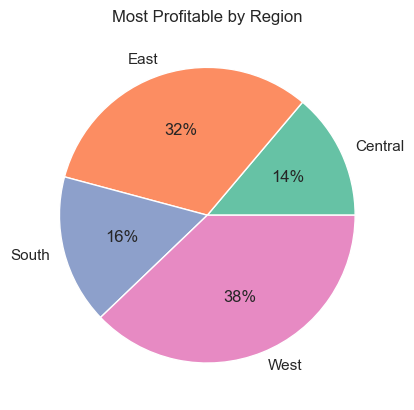

In [53]:
plt.pie(reg_analysis.Profit, labels = reg_analysis.Region, autopct = "%1.0f%%")
plt.title("Most Profitable by Region")

plt.show()